In [17]:
#Collaborated with Nikitha Sharma
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn import preprocessing

print(tf.__version__)

1.9.0


In [18]:
data = pd.read_csv("data.csv") 

In [20]:
print('Size of weather data frame is :',data.shape)

Size of weather data frame is : (142193, 24)


In [21]:
data.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64

In [22]:
data = data.drop(columns=['Evaporation','Sunshine','Cloud3pm','Cloud9am','Date','Location','RISK_MM'],
                 axis=1)
data = data.dropna(how='any')
print(data.shape)

(112925, 17)


In [23]:
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [24]:
categoric_c = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
datafinal = pd.get_dummies(data, columns=categoric_c)
print(datafinal.shape)
datafinal.head()

(112925, 62)


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
standa = preprocessing.MinMaxScaler()
standa.fit(datafinal)
datafinal = pd.DataFrame(standa.transform(datafinal), index=datafinal.index, columns=datafinal.columns)
datafinal.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0.513064,0.446154,0.001632,0.289062,0.211765,0.258824,0.71,0.22,0.449587,0.4800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.370546,0.494505,0.000000,0.289062,0.023529,0.235294,0.44,0.25,0.497521,0.4912,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.501188,0.507692,0.000000,0.304688,0.200000,0.282353,0.38,0.30,0.447934,0.5056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.413302,0.558242,0.000000,0.132812,0.105882,0.082353,0.45,0.16,0.613223,0.5712,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.610451,0.652747,0.002720,0.265625,0.058824,0.211765,0.82,0.33,0.500826,0.4624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
corr = datafinal.corr()
corr1 = pd.DataFrame(abs(corr['RainTomorrow']),columns = ['RainTomorrow'])
nonvals = corr1.loc[corr1['RainTomorrow'] < 0.005]
print('Var correlation < 0.5%',nonvals)
nonvals = list(nonvals.index.values)

Var correlation < 0.5%                  RainTomorrow
WindGustDir_S        0.001759
WindGustDir_SSW      0.003007
WindDir3pm_SSW       0.003230
WindDir3pm_WSW       0.002857
WindDir9am_SW        0.004053


In [28]:
datafinal1 = datafinal.drop(columns=nonvals,axis=1)
print('Data Final',datafinal1.shape)

Data Final (112925, 57)


In [29]:
from sklearn.model_selection import train_test_split
Y = datafinal1['RainTomorrow']
X = datafinal1.drop(columns=['RainTomorrow'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [30]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (90340, 56)
Y train shape:  (90340,)
X test shape:  (22585, 56)
Y test shape:  (22585,)


In [31]:
# logistic regression is used
from sklearn.linear_model import LogisticRegression
logicreg = LogisticRegression(C=10)
logicreg.fit(X_train, Y_train)
Y_predict1 = logicreg.predict(X_test)

C:\Users\pniki\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


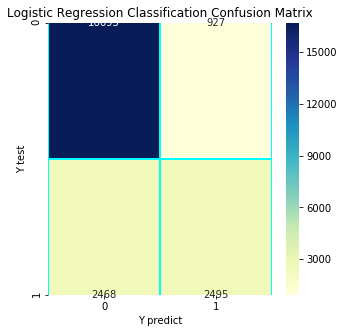

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [35]:
score_logicreg = logicreg.score(X_test, Y_test)
print(score_logicreg)

0.8496789904804074
